In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib as jl
# import maths

In [212]:
ub = pd.read_csv('Used_Bikes.csv')

In [213]:
ub.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


#1. Handle missing values

#Check and fill missing values

In [214]:
ub.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [215]:
ub = ub.fillna(0)

#2. Remove duplicates

In [216]:
ub.duplicated().sum() # Checking Duplicates


np.int64(25324)

In [217]:
ub.drop_duplicates(inplace=True)

In [218]:
ub.duplicated().sum() # Checking Duplicates

np.int64(0)

In [219]:
# ub.info()

#3. Convert data types (into float)

#4. Clean text columns

In [220]:
ub['owner'] = ub['owner'].str.strip() # Removing leading and trailing spaces
ub['brand'] = ub['brand'].str.strip() # Removing leading and trailing spaces

In [221]:
ub.shape

(7324, 8)

#5. Drop Useless Data Columns

In [222]:
ub.drop(['bike_name','city'],axis=1,inplace=True) # drops useless columns

#. Checking by Visualizations

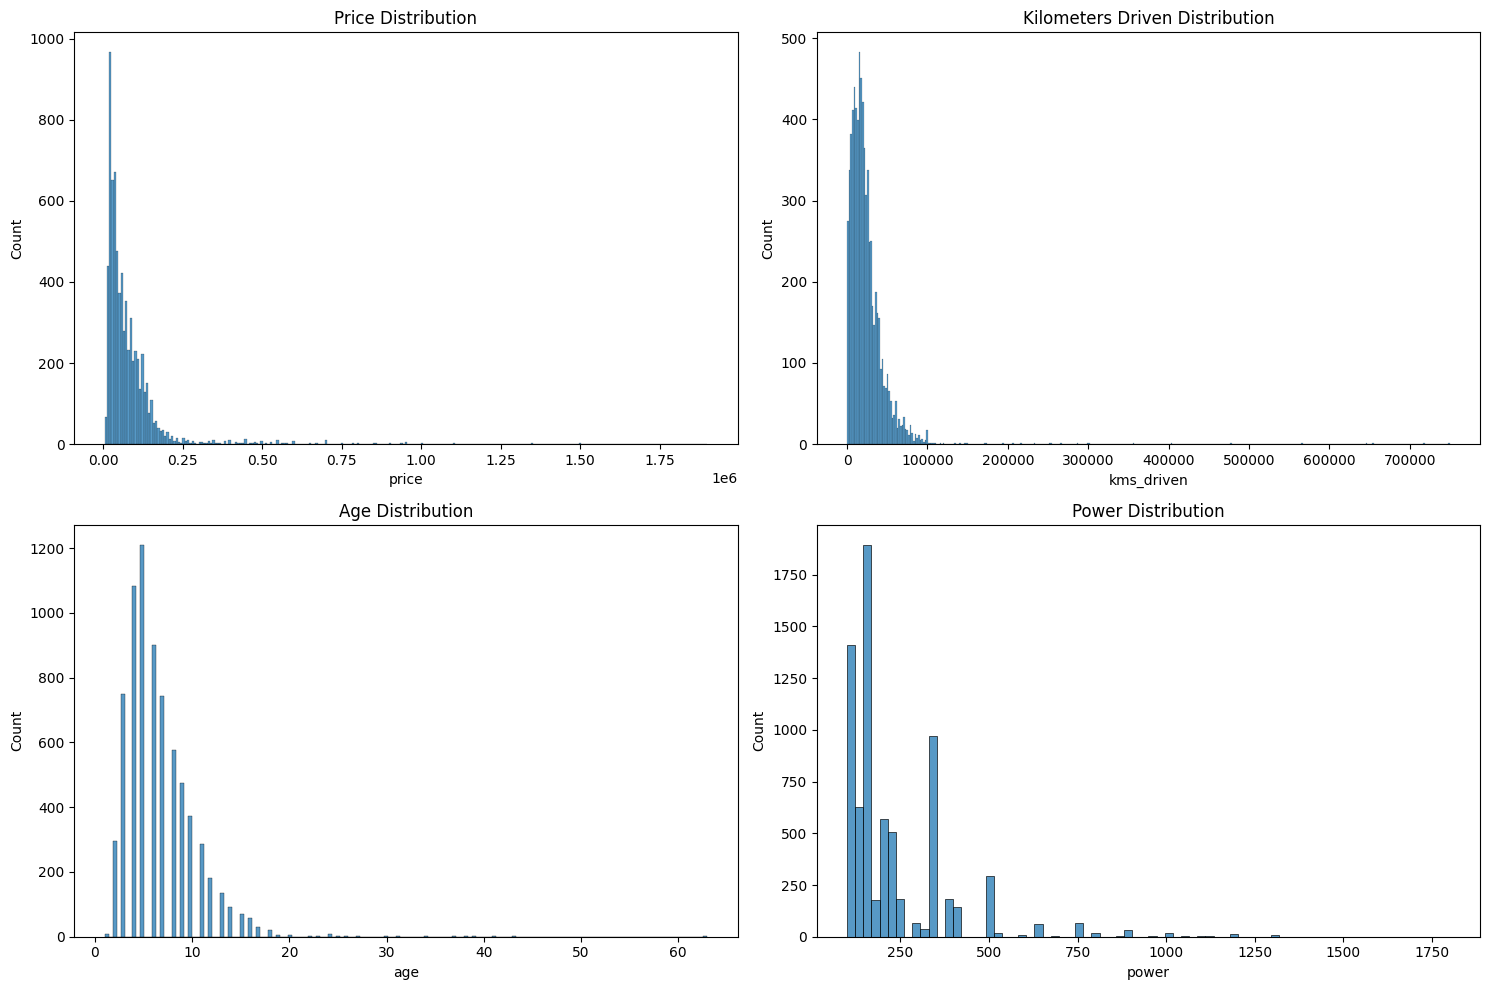

In [223]:
# Create distribution plots for numerical columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(ub['price'])
plt.title('Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(ub['kms_driven'])
plt.title('Kilometers Driven Distribution')

plt.subplot(2, 2, 3)
sns.histplot(ub['age'])
plt.title('Age Distribution')

plt.subplot(2, 2, 4)
sns.histplot(ub['power'])
plt.title('Power Distribution')

plt.tight_layout()
plt.show()

#6. Cleans Outliers

In [224]:
# Check for and remove bikes with unrealistic prices
ub = ub[ub['price'] > 1000]  # Remove bikes with very low prices
ub = ub[ub['price'] < 1000000]  # Remove extremely expensive bikes

# Check for and remove bikes with unrealistic kilometers driven
ub = ub[ub['kms_driven'] < 200000]  # Remove bikes with very high kilometers

# Check for and remove bikes with unrealistic age
ub = ub[ub['age'] < 20]  # Remove bikes older than 20 years

# Create price ranges for analysis
# ub['price_range'] = pd.qcut(ub['price'], q=4, labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'])

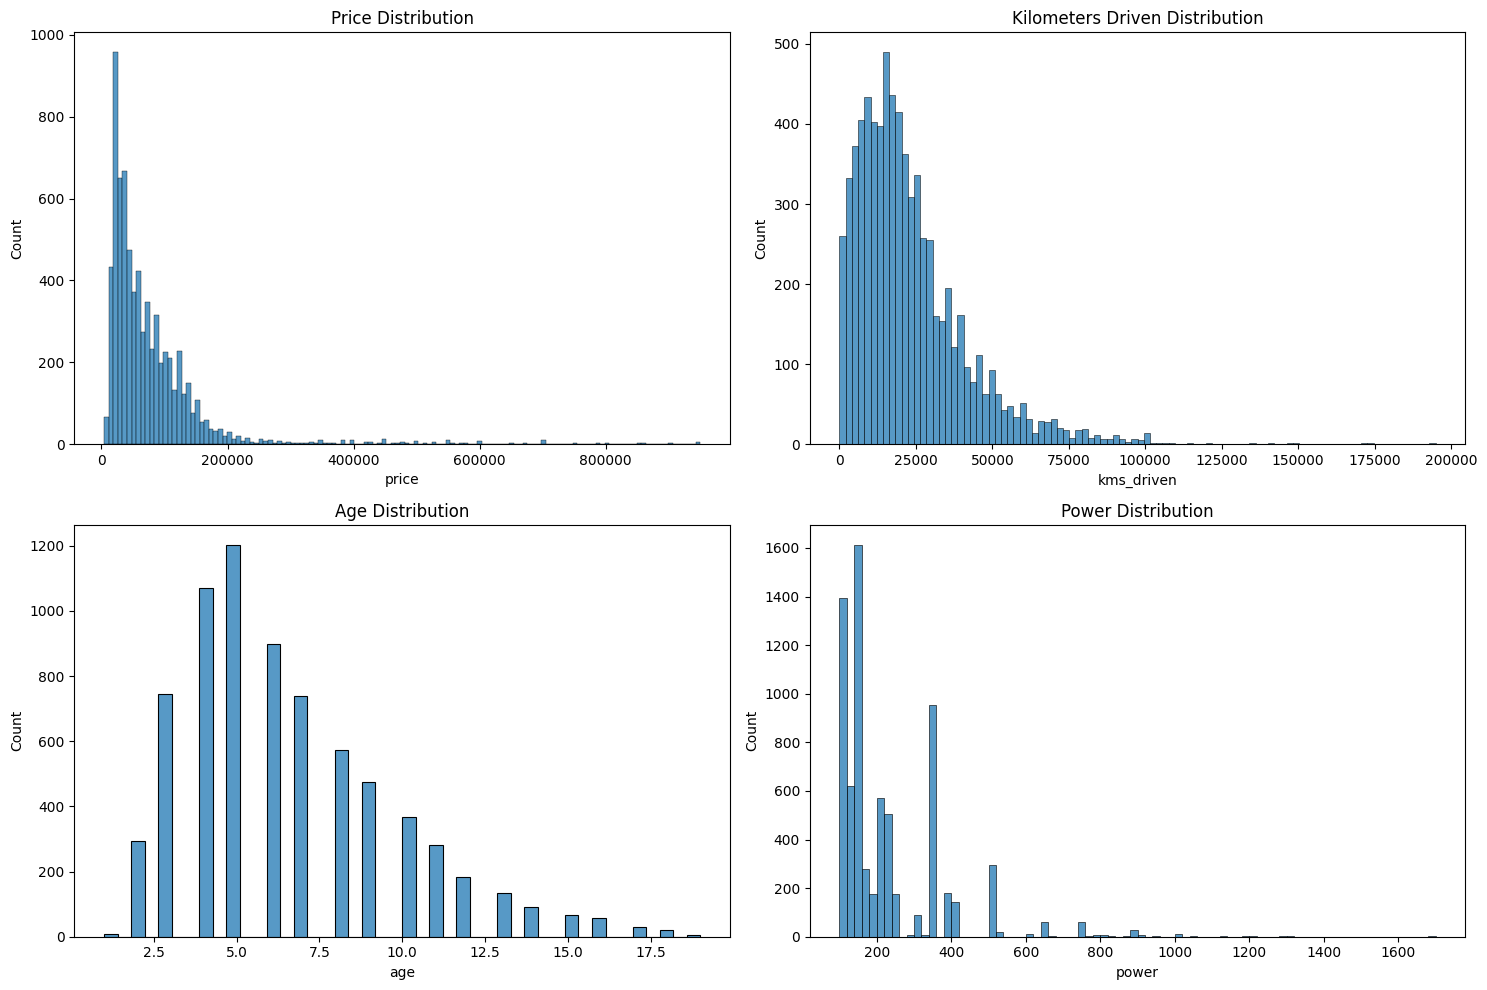

In [225]:
# Create distribution plots for numerical columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(ub['price'])
plt.title('Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(ub['kms_driven'])
plt.title('Kilometers Driven Distribution')

plt.subplot(2, 2, 3)
sns.histplot(ub['age'])
plt.title('Age Distribution')

plt.subplot(2, 2, 4)
sns.histplot(ub['power'])
plt.title('Power Distribution')

plt.tight_layout()
plt.show()

#CODE FOR SAVING CLEANED OR UPDATED CSV FILE AS A NEW FILE

In [226]:
# Save the cleaned dataset
# ub.to_csv('cleaned_used_bikes.csv', index=False)

#7. Preprocessing
* LabelEncoding
* OneHotEncoding

In [227]:
from sklearn.preprocessing import LabelEncoder

In [228]:
le = LabelEncoder()

In [229]:
ub['owner'] = le.fit_transform(ub['owner']) +1 # +1 is used for start indexing by 1
ub['owner'] = ub['owner'].astype(float)

ub['brand'] = le.fit_transform(ub['brand']) +1
ub['brand'] = ub['brand'].astype(float)

In [230]:
ub

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1.0,3.0,110.0,18.0
1,119900.0,11000.0,1.0,4.0,350.0,16.0
2,600000.0,110.0,1.0,8.0,675.0,19.0
3,65000.0,16329.0,1.0,4.0,180.0,18.0
4,80000.0,10000.0,1.0,3.0,150.0,20.0
...,...,...,...,...,...,...
9362,25000.0,48587.0,1.0,8.0,150.0,6.0
9369,35000.0,60000.0,1.0,9.0,220.0,2.0
9370,450000.0,3430.0,1.0,4.0,750.0,5.0
9371,139000.0,21300.0,1.0,4.0,400.0,2.0


#8. Splits Data Training and Testing Sets

In [231]:
from sklearn.model_selection import train_test_split


In [232]:
x = ub.drop('price', axis=1)
y = ub['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [233]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5798, 5), (1450, 5), (5798,), (1450,))

In [234]:
# x.info()

In [235]:
# y.head()

#9. Training the Choosed Model
* Classification
* Regression

#. Linear Regression

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
# obj
lr = LinearRegression()

In [238]:
lr.fit(x_train, y_train)

LinearRegression()

In [239]:
print("training score :-", lr.score(x_train, y_train))

training score :- 0.7177318570802819


In [240]:
print("testing score :-", lr.score(x_test, y_test))

testing score :- 0.739741474970248


#------------------------------------------------------------------------------------------

In [241]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [242]:
ac= AdaBoostClassifier()
ac.fit(x_train, y_train)

AdaBoostClassifier()

In [243]:
# Training and testing score
print("Training Accuracy: ", ac.score(x_train, y_train))
print("Testing Accuracy: ", ac.score(x_test, y_test))

Training Accuracy:  0.03673680579510176
Testing Accuracy:  0.03793103448275862


In [244]:
base_estimator = DecisionTreeClassifier(max_depth=100)
ac = AdaBoostClassifier(n_estimators=10000, learning_rate=10000, estimator=base_estimator, random_state=42)
ac.fit(x_train, y_train)

e:\coding\ProgrammingSoftware\PYTHON\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
e:\coding\ProgrammingSoftware\PYTHON\Lib\site-packages\sklearn\base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 0, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=100),
                   learning_rate=10000, n_estimators=10000, random_state=42)

In [245]:
# Training and testing score
print("Training Accuracy: ", ac.score(x_train, y_train))
print("Testing Accuracy: ", ac.score(x_test, y_test))

Training Accuracy:  0.9498102794066919
Testing Accuracy:  0.04275862068965517
